In [1]:
import numpy as np
import utils
import os
from tspheuristics import NearestNeigbour, GenAlgo, LinProg
import time

Solución a instancia Inst52.txt con NN: 8980.918279329191; 216000 nanosegundos
Solución a instancia Inst52.txt con GenAlgo: 8615.210726602802; 4.714179039001465 segundos
Solución a instancia Inst51.txt con NN: 513.610006884723; 195000 nanosegundos
Solución a instancia Inst51.txt con GenAlgo: 459.0307218055151; 4.499933958053589 segundos
Solución a instancia Inst29.txt con NN: 10211.18472743141; 72000 nanosegundos
Solución a instancia Inst29.txt con GenAlgo: 9791.768623593907; 1.3122057914733887 segundos
Solución a instancia Inst70.txt con NN: 805.5312008437772; 356000 nanosegundos
Solución a instancia Inst70.txt con GenAlgo: 764.5191496290885; 9.684892892837524 segundos
Solución a instancia Inst48.txt con NN: 40526.42105630375; 183000 nanosegundos
Solución a instancia Inst48.txt con GenAlgo: 38563.274716921456; 4.0042359828948975 segundos


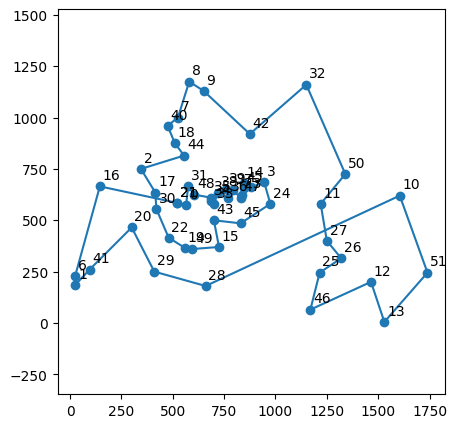

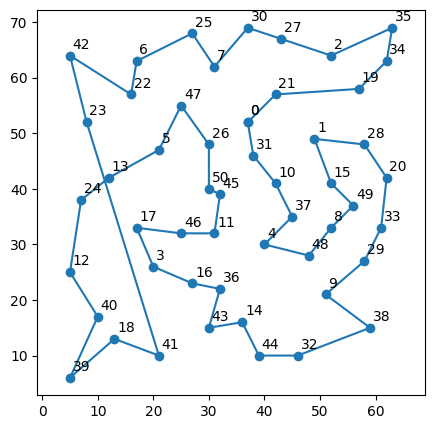

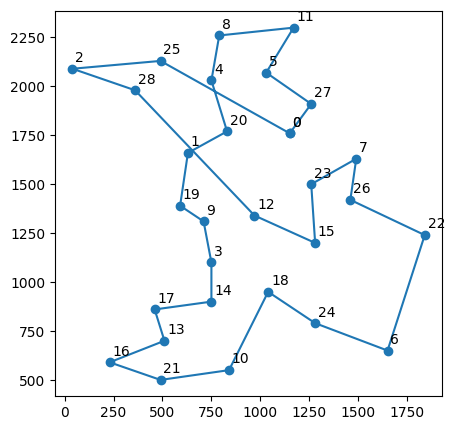

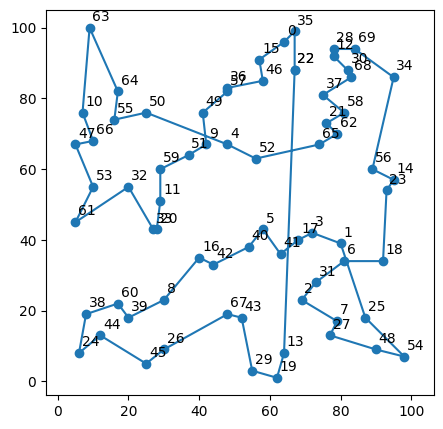

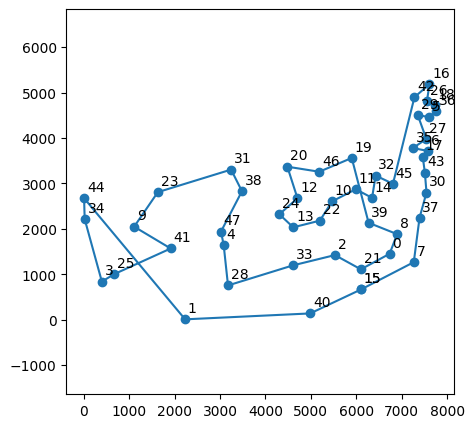

In [2]:
# Probar con todas las intancias.
for filename in os.listdir('instances/'):
    cities = utils.read_instance(filename)
    tsp_inst = utils.dist_mat(cities)

    nn = NearestNeigbour(tsp_inst)
    gen = GenAlgo(tsp_inst, pop_size=len(cities)*2)

    start = time.time_ns()
    nn.solve(start=0, verbose=False)
    end = time.time_ns()
    print(f"Solución a instancia {filename} con NN: {nn.cost}; {end-start} nanosegundos")    
    
    start = time.time()
    gen.solve(verbose=False)
    end = time.time()
    print(f"Solución a instancia {filename} con GenAlgo: {gen.cost}; {end-start} segundos")
    utils.plot_sol(cities, gen.res, savefig=f"gen-{filename.replace('.txt','')}-sol.png")

## Ejemplo de uso

In [ ]:
cities = utils.read_instance('Inst48.txt')
tsp_inst = utils.dist_mat(cities)

In [ ]:
nn1 = NearestNeigbour(tsp_inst)
gen1 = GenAlgo(tsp_inst)

In [ ]:
nn1.solve(start=0)

In [ ]:
gen1.solve(verbose=False)
gen1.cost

In [ ]:
utils.plot_sol(cities,gen1.res)

# Evaluación de las instancias con programación lineal

In [3]:
inst = 'Inst48'
cities = utils.read_instance(f'{inst}.txt')
tsp_inst = utils.dist_mat(cities)
mymip = LinProg(tsp_inst)

In [ ]:
start = time.time()
mymip.solve()
end = time.time()
print(f"Solución a instancia {inst} con programación lineal: {mymip.cost}; {end-start} segundos")

In [ ]:
utils.plot_sol(cities, mymip.res, savefig=f"lp-{inst}-sol.png")